# Trabalho sobre Perceptron em Redes Neurais Artificiais

## Introdução ao modelo de Perceptron

O Perceptron é um modelo matemático de um neurônio artificial, proposto por Frank Rosenblatt em 1958 (psicólogo e cientista da computação norte-americano, nascido em 1928). Este foi um dos primeiros modelos computacionais inspirados no funcionamento dos neurônios biológicos. Ele foi criado como uma forma de simular o processo de aprendizado do cérebro humano em máquinas usando operações simples de adição e subtração.

O neurônio matemático calcula uma soma ponderada das entradas (inputs), aplica uma função de ativação (originalmente um limiar), produzindo uma saída (output) binária (0 ou 1).

## Estrutura básica do Perceptron

O corpo do neurônio Perceptron é representado por uma composição de dois módulos, o primeiro é uma junção aditiva, somatório dos estímulos (sinais de entrada) multiplicado pelo seu fator excitatório (pesos sinápticos), e posteriormente uma função de ativação, que definirá com base nas entradas e pesos sinápticos, qual será a saída da célula. O axônio é aqui representado pela saída (y) obtida pela aplicação da função de ativação. Assim como no modelo biológico, o estímulo pode ser excitatório ou inibitório, representado pelo peso sináptico positivo ou negativo respectivamente.

- Sinais de entrada são representados por X1, X2, ..., Xn. São os sinais externos normalmente normalizados para incrementar a eficiência computacional dos algoritmos de aprendizagem. São os dados que alimentam a rede preditiva.

- Pesos sinápticos são representados por W1, W2, ..., Wn. São valores para ponderar os sinais de cada entrada da rede. Esses valores são aprendidos durante o treinamento.

- Combinador linear { Σ }: Agregar todos sinais de entrada que foram ponderados pelos respectivos pesos sinápticos a fim de produzir um potencial de ativação.

- Limiar de ativação { Θ }: Define qual será o limiar para que o resultado produzido pelo combinador linear possa gerar um valor de disparo de ativação.

- Potencial de ativação { u }: É o resultado obtido pela diferença do valor produzido entre o combinador linear e o limiar de ativação. Se o valor for positivo (u ≥ 0) então o neurônio produz potencial excitatório; senão, o potencial será inibitório.

- Função de ativação { g }: Seu objetivo é limitar a saída de um neurônio em um intervalo valores.

- Sinal de saída { y }: É o valor final de saída podendo ser usado como entrada de outros neurônios que estão sequencialmente interligados.

Figura 1: representação do neurônio perceptron.

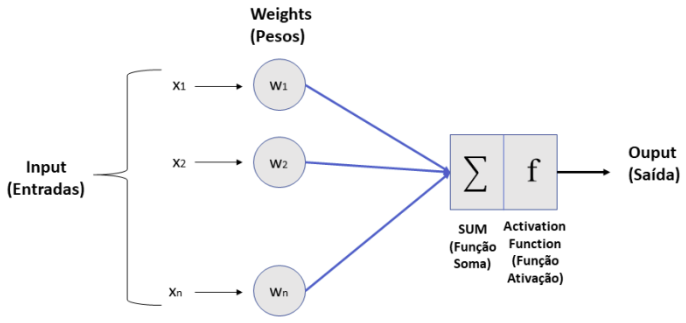

Fonte: acervo do autor.

O modelo do neurônio matemático pode incluir bias de entrada, que é uma variável adicionada ao somatório da função de ativação, com o intuito de aumentar o grau de adaptabilidade desta função e, consequentemente, a capacidade de aproximação da resposta certa da rede para o problema. O valor do bias é ajustado da mesma forma que os pesos sinápticos, o que possibilita que um neurônio apresente saída não nula ainda que todas as suas entradas sejam nulas. Por exemplo, caso não houvesse o bias e todas as entradas de um neurônio fossem nulas, então o valor da função de ativação seria nulo. Desta forma não poderíamos, por exemplo, fazer com o que o neurônio aprendesse a relação pertinente ao ”ou exclusivo” da lógica. 

Um neurônio dispara quando a soma dos impulsos que ele recebe ultrapassa o seu limiar de excitação chamado de threshold. O corpo do neurônio, por sua vez, é emulado por um mecanismo simples que faz a soma dos valores xi e wi recebidos pelo neurônio (soma ponderada) e decide se o neurônio deve ou não disparar (saída igual a 1 ou a 0) comparando a soma obtida ao limiar (threshold). A ativação do neurônio é obtida através da aplicação de uma “função de ativação”, que ativa a saída ou não, dependendo do valor da soma ponderada das suas entradas.

Com isso o neurônio Perceptron ganha uma natureza binária. Tanto os sinais de entrada quanto a saída, são valores binários. McCulloch acreditava que o funcionamento do sistema nervoso central possuía um carater binário, ou seja, um neurônio infuencia ou não outro neurônio, mas posteriormente mostrou-se que não era dessa forma.

Fazendo uma analogia do neurônio biológico para o matemático, os dendritos e axônios são representados matematicamente apenas pelas sinapses, e a intensidade da ligação é representada por uma grandeza denominada peso sináptico, simbolizada pela letra w. Quando as entradas, x são apresentadas ao neurônio, elas são multiplicadas pelos pesos sinápticos correspondentes, gerando as entradas ponderadas, ou seja, x1 que multiplica w1, etc... Isso descreve uma das bases matemáticas do funcionamento de uma rede neural artificial, a multiplicação de matrizes:

Figura 2: multiplicação de matrizes entre sinais de entrada x e pesos w.

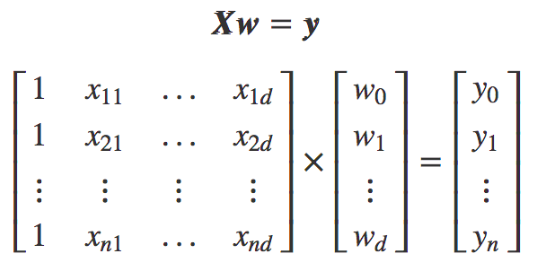

Fonte: Deep Learning Book, Data Science Academy.

# Implementação do Perceptron

In [10]:
class Perceptron:
    """
    Implementação de um Perceptron simples sem uso de bibliotecas externas.
    """
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = []
        self.bias = 0
        self.errors = []

    def predict(self, x):
        activation = self.bias
        for i in range(len(x)):
            activation += self.weights[i] * x[i]
        return 1 if activation >= 0 else 0

    def fit(self, X, y):
        n_features = len(X[0])
        self.weights = [0.0 for _ in range(n_features)]
        self.bias = 0

        for _ in range(self.n_iters):
            total_errors = 0
            for xi, target in zip(X, y):
                y_pred = self.predict(xi)
                error = target - y_pred
                total_errors += abs(error)
                for i in range(n_features):
                    self.weights[i] += self.learning_rate * error * xi[i]
                self.bias += self.learning_rate * error
            self.errors.append(total_errors)

In [11]:
# Dados da porta lógica AND
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
y = [0, 0, 0, 1]   # Saída da porta lógica AND

In [16]:
import matplotlib.pyplot as plt
import numpy as np

Entrada: [0, 0] => Previsão: 0
Entrada: [0, 1] => Previsão: 0
Entrada: [1, 0] => Previsão: 0
Entrada: [1, 1] => Previsão: 1


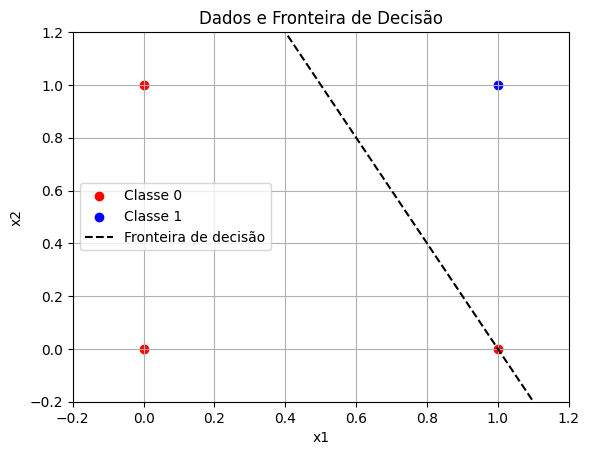

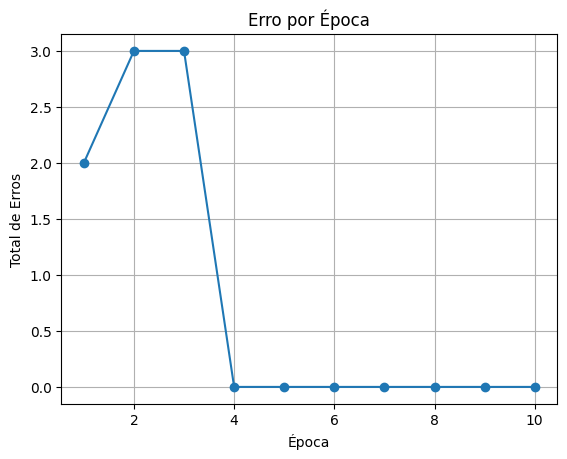

In [13]:
# Treinar o perceptron
p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)

# Fazer previsões
for xi in X:
    print(f"Entrada: {xi} => Previsão: {p.predict(xi)}")

# Gráfico 1: Dados e Fronteira de Decisão
X_np = np.array(X)
y_np = np.array(y)

plt.figure()
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='red', label='Classe 0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='blue', label='Classe 1' if i == 3 else "")

x1_vals = np.linspace(-0.1, 1.1, 100)
if p.weights[1] != 0:
    x2_vals = -(p.weights[0] * x1_vals + p.bias) / p.weights[1]
    plt.plot(x1_vals, x2_vals, 'k--', label='Fronteira de decisão')
else:
    plt.axvline(-p.bias / p.weights[0], color='k', linestyle='--', label='Fronteira de decisão')

plt.title('Dados e Fronteira de Decisão')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.grid(True)
plt.savefig('fronteira_decisao_and.png', dpi=300)
plt.show()
plt.close()

# Gráfico 2: Erro por Época
plt.figure()
plt.plot(range(1, len(p.errors) + 1), p.errors, marker='o')
plt.title('Erro por Época')
plt.xlabel('Época')
plt.ylabel('Total de Erros')
plt.grid(True)
plt.savefig('erro_por_epoca_and.png', dpi=300)
plt.show()
plt.close()

- Eixos X e Y: representam os dois registros (features) de entrada da porta AND (valores binários das entrada x1 e x2).

- Pontos vermelhos (Classe 0): representam combinações de entrada para as quais a saída da porta AND é 0.

- Ponto azul (Classe 1): representa a única entrada [1, 1] onde a porta AND retorna 1.

- Linha tracejada preta (Fronteira de decisão): é a linha que divide o plano de entrada entre as regiões onde o Perceptron prediz 0 e onde prediz 1.

A linha preta divide corretamente os pontos [0, 0], [1, 0] e [0, 1] (classe 0) da entrada [1, 1] (classe 1). 

Isso é consistente com a lógica da porta AND: a saída só é 1 quando ambas as entradas são 1.

O Perceptron conseguiu aprender uma fronteira linear que separa corretamente os dados da porta lógica AND.

Essa separabilidade linear é possível nesse caso porque a porta AND é linearmente separável.

In [6]:
# Conjunto de dados simples (OR)
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
y = [0, 1, 1, 1]  # Saída da porta lógica OR

Entrada: [0, 0] => Previsão: 0
Entrada: [0, 1] => Previsão: 1
Entrada: [1, 0] => Previsão: 1
Entrada: [1, 1] => Previsão: 1


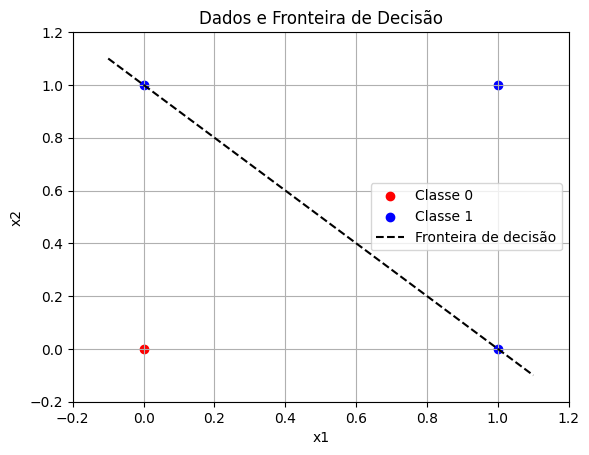

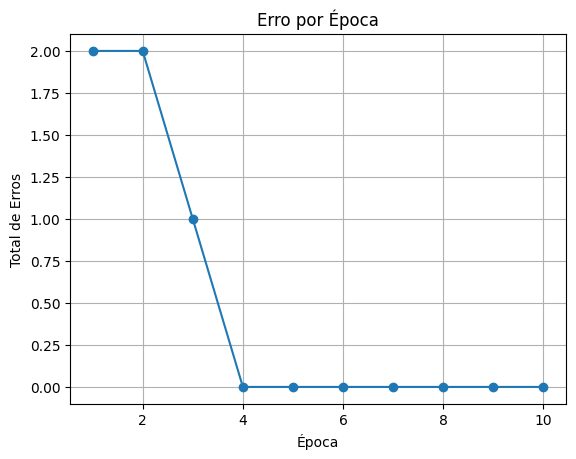

In [7]:
# Treinar o perceptron
p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)

# Fazer previsões
for xi in X:
    print(f"Entrada: {xi} => Previsão: {p.predict(xi)}")

# Gráfico 1: Dados e Fronteira de Decisão
X_np = np.array(X)
y_np = np.array(y)

plt.figure()
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='red', label='Classe 0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='blue', label='Classe 1' if i == 3 else "")

x1_vals = np.linspace(-0.1, 1.1, 100)
if p.weights[1] != 0:
    x2_vals = -(p.weights[0] * x1_vals + p.bias) / p.weights[1]
    plt.plot(x1_vals, x2_vals, 'k--', label='Fronteira de decisão')
else:
    plt.axvline(-p.bias / p.weights[0], color='k', linestyle='--', label='Fronteira de decisão')

plt.title('Dados e Fronteira de Decisão')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.grid(True)
plt.savefig('fronteira_decisao_or.png', dpi=300)
plt.show()
plt.close()

# Gráfico 2: Erro por Época
plt.figure()
plt.plot(range(1, len(p.errors) + 1), p.errors, marker='o')
plt.title('Erro por Época')
plt.xlabel('Época')
plt.ylabel('Total de Erros')
plt.grid(True)
plt.savefig('erro_por_epoca_or.png', dpi=300)
plt.show()
plt.close()

Classe 0 (vermelho): [0, 0]

Classe 1 (azul): [0, 1], [1, 0], [1, 1]
(diferente da porta AND, estes são rótulos de uma porta lógica OR)

A linha divide o plano de forma que:

- Abaixo da linha: classe 0

- Acima da linha: classe 1

Neste caso, a linha separa [0, 0] (classe 0) dos demais pontos ([0,1], [1,0], [1,1]), que são todos classe 1. A fronteira de decisão está correta e reflete que o Perceptron aprendeu a porta OR, traçando uma reta que separa [0, 0] do restante.

In [14]:
# Conjunto de dados simples (OR)
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
y = [0, 1, 1, 0]  # Saída da porta lógica OR

Entrada: [0, 0] => Previsão: 1
Entrada: [0, 1] => Previsão: 1
Entrada: [1, 0] => Previsão: 0
Entrada: [1, 1] => Previsão: 0


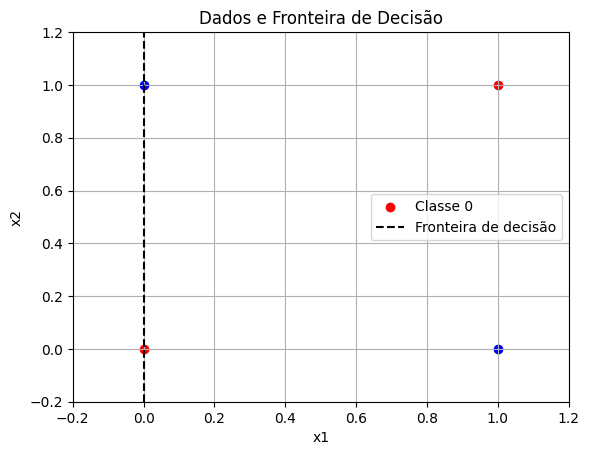

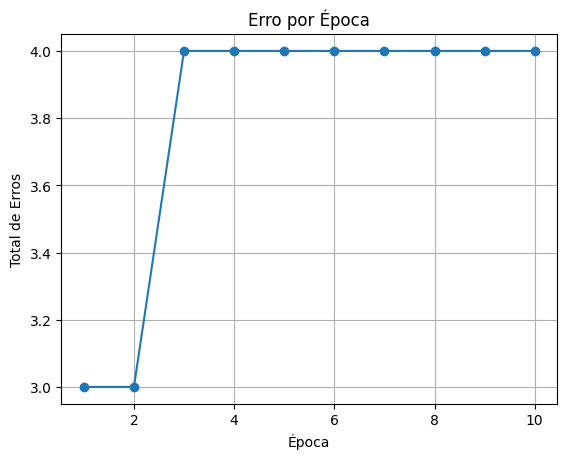

In [15]:
# Treinar o perceptron
p = Perceptron(learning_rate=0.1, n_iters=10)
p.fit(X, y)

# Fazer previsões
for xi in X:
    print(f"Entrada: {xi} => Previsão: {p.predict(xi)}")

# Gráfico 1: Dados e Fronteira de Decisão
X_np = np.array(X)
y_np = np.array(y)

plt.figure()
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='red', label='Classe 0' if i == 0 else "")
    else:
        plt.scatter(X[i][0], X[i][1], color='blue', label='Classe 1' if i == 3 else "")

x1_vals = np.linspace(-0.1, 1.1, 100)
if p.weights[1] != 0:
    x2_vals = -(p.weights[0] * x1_vals + p.bias) / p.weights[1]
    plt.plot(x1_vals, x2_vals, 'k--', label='Fronteira de decisão')
else:
    plt.axvline(-p.bias / p.weights[0], color='k', linestyle='--', label='Fronteira de decisão')

plt.title('Dados e Fronteira de Decisão')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.grid(True)
plt.savefig('fronteira_decisao_xor.png', dpi=300)
plt.show()
plt.close()

# Gráfico 2: Erro por Época
plt.figure()
plt.plot(range(1, len(p.errors) + 1), p.errors, marker='o')
plt.title('Erro por Época')
plt.xlabel('Época')
plt.ylabel('Total de Erros')
plt.grid(True)
plt.savefig('erro_por_epoca_xor.png', dpi=300)
plt.show()
plt.close()

O gráfico mostra que a linha de decisão é vertical, passando por x1 = 0. Isso quer dizer que o Perceptron não é capaz de separar corretamente os dados do XOR porque o problema é não linearmente separável. Ele precisa de uma combinação não linear de x1 e x2. O Perceptron com uma única camada só aprende padrões linearmente separáveis.

- A classe 0 aparece tanto em (0, 0) quanto em (1, 1).

- E a classe 1 aparece em (0, 1) e (1, 0).

Esses pontos não podem ser separados com uma linha reta simples.

A solução do XOR só foi possível com o avanço das redes neurais multicamadas, que usam funções de ativação não-lineares e múltiplos neurônios (MLP – Multi-Layer Perceptron).

# 10 Funções de Ativação

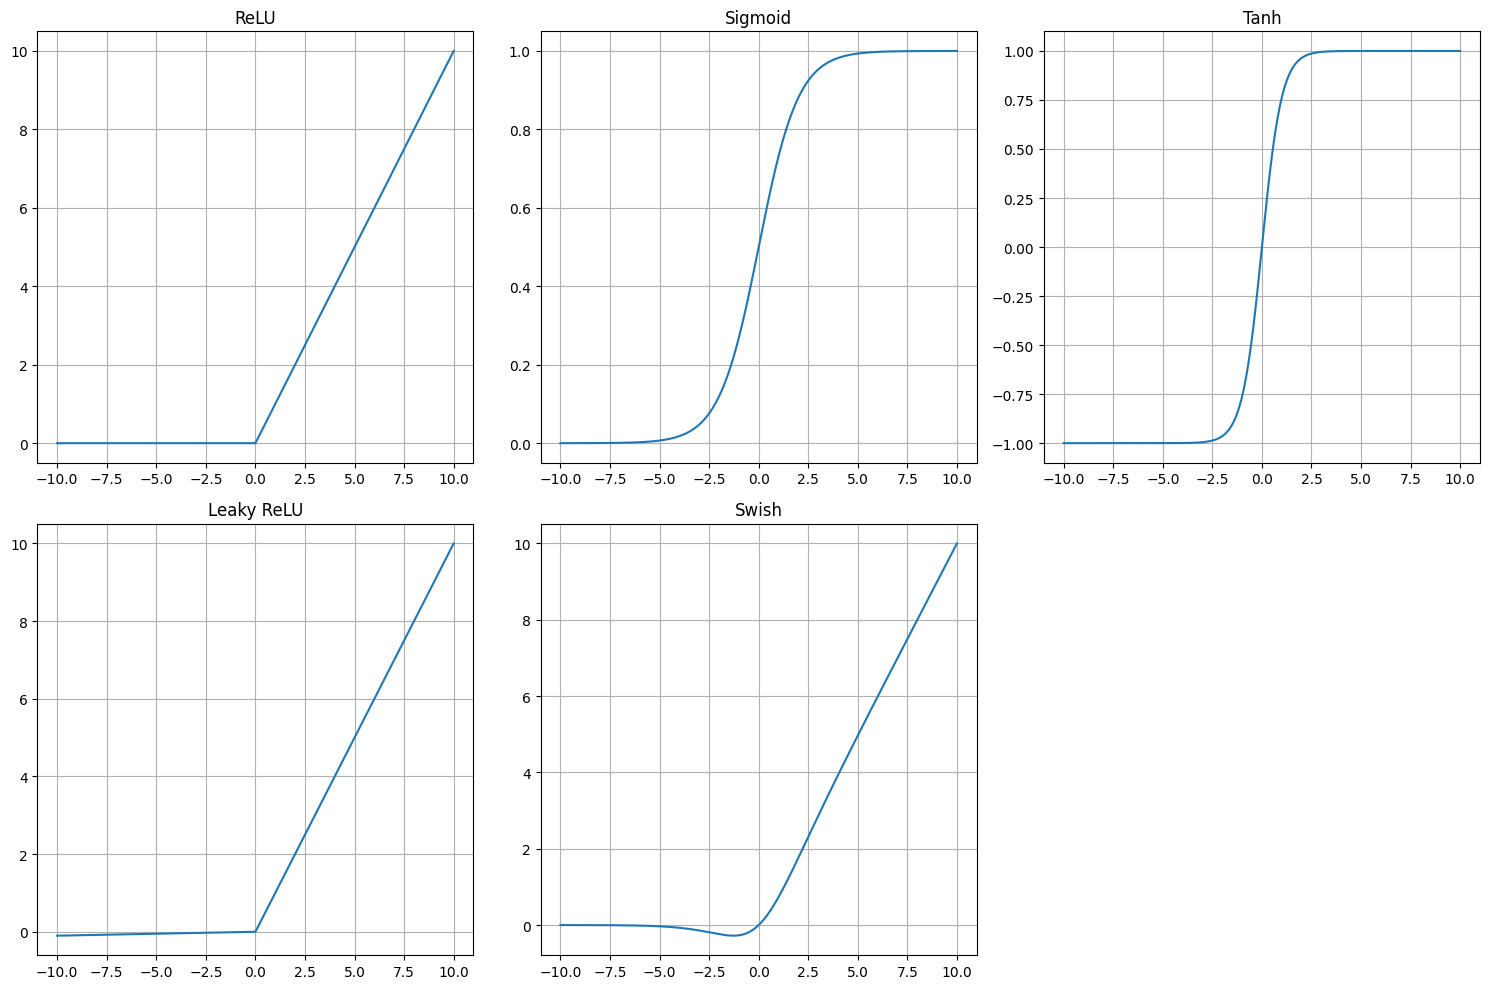

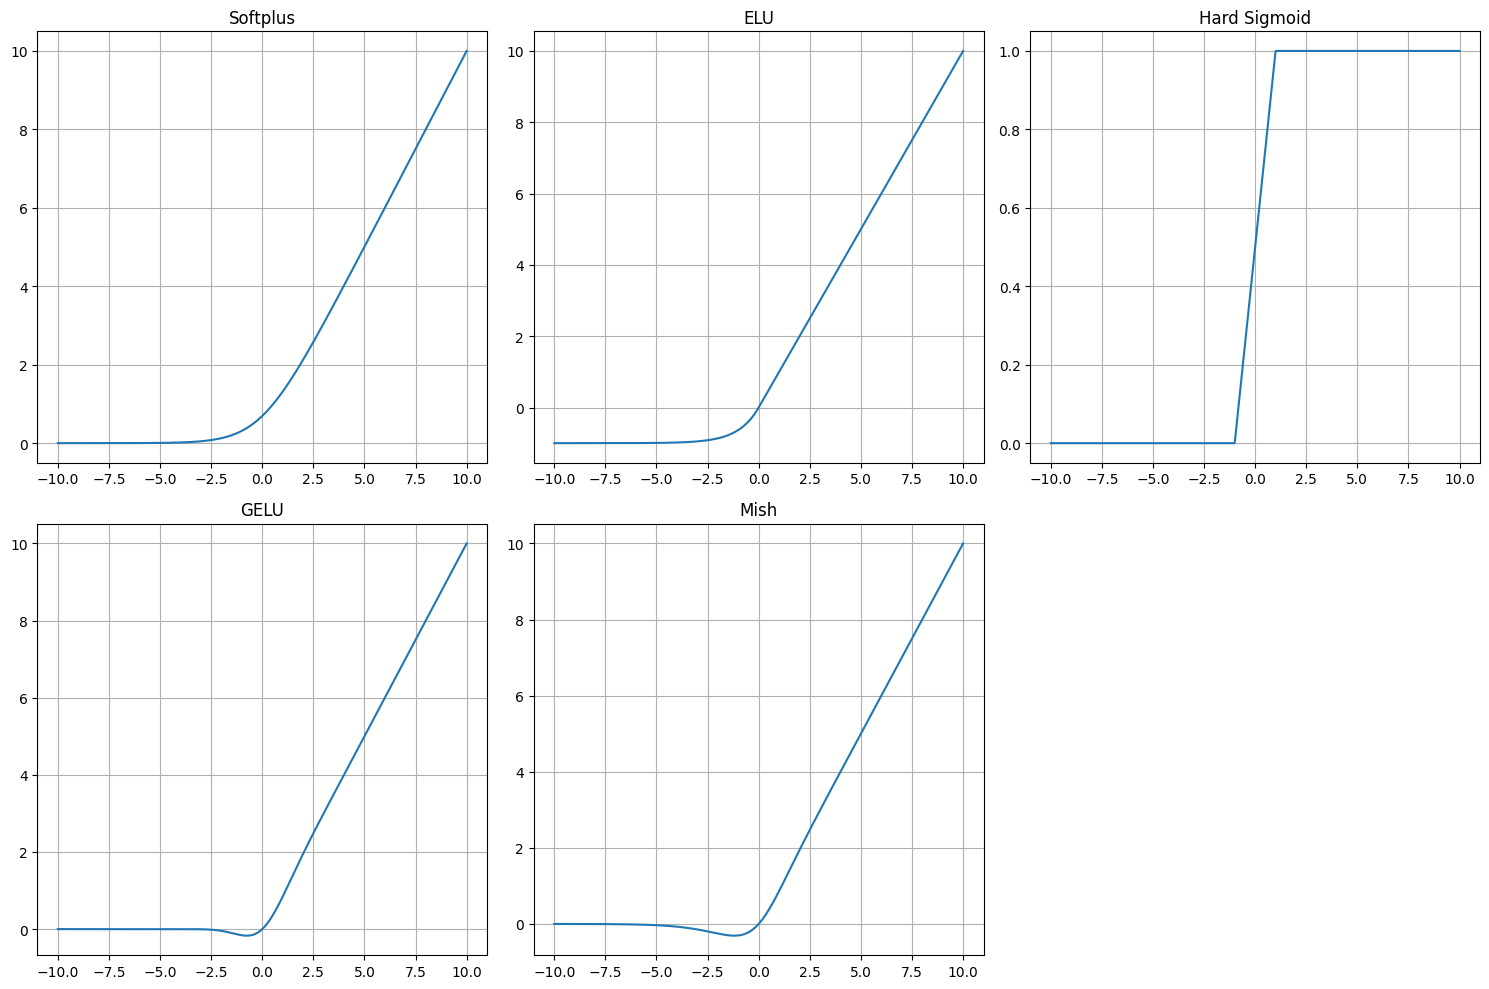

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de ativação
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def swish(x):
    return x * sigmoid(x)

def softplus(x):
    return np.log1p(np.exp(x))  # log(1 + exp(x)), mais estável numericamente

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def hard_sigmoid(x):
    return np.clip((x + 1) / 2, 0, 1)

def gelu(x):
    # aproximação rápida
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def mish(x):
    return x * np.tanh(softplus(x))

# Gerando os inputs
x = np.linspace(-10, 10, 1000)

# Calculando os outputs
y_relu = relu(x)
y_sigmoid = sigmoid(x)
y_tanh = tanh(x)
y_leaky_relu = leaky_relu(x)
y_swish = swish(x)

# Plotando os gráficos
plt.figure(figsize=(15, 10))

# ReLU
plt.subplot(2, 3, 1)
plt.plot(x, y_relu)
plt.title("ReLU")
plt.grid(True)

# Sigmoid
plt.subplot(2, 3, 2)
plt.plot(x, y_sigmoid)
plt.title("Sigmoid")
plt.grid(True)

# Tanh
plt.subplot(2, 3, 3)
plt.plot(x, y_tanh)
plt.title("Tanh")
plt.grid(True)

# Leaky ReLU
plt.subplot(2, 3, 4)
plt.plot(x, y_leaky_relu)
plt.title("Leaky ReLU")
plt.grid(True)

# Swish
plt.subplot(2, 3, 5)
plt.plot(x, y_swish)
plt.title("Swish")
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculando os outputs
y_softplus = softplus(x)
y_elu = elu(x)
y_hard_sigmoid = hard_sigmoid(x)
y_gelu = gelu(x)
y_mish = mish(x)

# Plotando os gráficos
plt.figure(figsize=(15, 10))

# Softplus
plt.subplot(2, 3, 1)
plt.plot(x, y_softplus)
plt.title("Softplus")
plt.grid(True)

# ELU
plt.subplot(2, 3, 2)
plt.plot(x, y_elu)
plt.title("ELU")
plt.grid(True)

# Hard Sigmoid
plt.subplot(2, 3, 3)
plt.plot(x, y_hard_sigmoid)
plt.title("Hard Sigmoid")
plt.grid(True)

# GELU
plt.subplot(2, 3, 4)
plt.plot(x, y_gelu)
plt.title("GELU")
plt.grid(True)

# Mish
plt.subplot(2, 3, 5)
plt.plot(x, y_mish)
plt.title("Mish")
plt.grid(True)

plt.tight_layout()
plt.show()

## Explicações das Funções de Ativação

### 1. ReLU (Rectified Linear Unit)
- **Fórmula:** 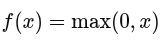
- **Características:**
  - Simples e computacionalmente eficiente.
  - Ajuda a reduzir o problema do gradiente desaparecendo.
  - Pode causar "neurônios mortos" (valores negativos resultam em saída zero).

---

### 2. Sigmoid
- **Fórmula:** 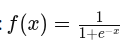
- **Características:**
  - Saída entre 0 e 1.
  - Usada para classificação binária.
  - Pode sofrer com saturação (gradiente próximo de zero nos extremos).

---

### 3. Tanh (Tangente Hiperbólica)
- **Fórmula:** 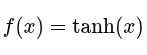
- **Características:**
  - Saída entre -1 e 1.
  - Mais centrada na origem do que a Sigmoid.
  - Também sofre com saturação nos extremos.

---

### 4. Leaky ReLU
- **Fórmula:**  
  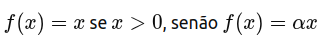 é pequeno (ex: 0.01).
- **Características:**
  - Permite pequena inclinação para valores negativos.
  - Resolve parcialmente o problema de neurônios mortos da ReLU.

---

### 5. Swish
- **Fórmula:** 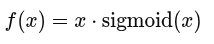
- **Características:**
  - Suave e não-monótona.
  - Proposta pelo Google.
  - Pode superar ReLU em algumas arquiteturas profundas.

---

### 6. Softplus
- **Fórmula:** 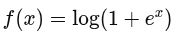
- **Características:**
  - Versão suavizada da ReLU.
  - Sempre derivável → bom para otimização.
  - Cresce de forma logarítmica para valores muito negativos.

---

### 7. ELU (Exponential Linear Unit)
- **Fórmula:**
  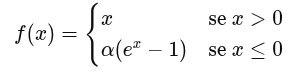
- **Características:**
  - Gera saídas negativas para \( x < 0 \), o que ajuda a manter a média da ativação próxima de zero.
  - Melhora o fluxo de gradiente comparado à ReLU.

---

### 8. Hard Sigmoid
- **Fórmula:**  
  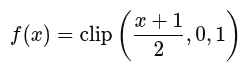
- **Características:**
  - Aproximação linear da Sigmoid.
  - Computacionalmente mais leve.
  - Útil para ambientes com poucos recursos.

---

### 9. GELU (Gaussian Error Linear Unit)
- **Fórmula (aproximação):**
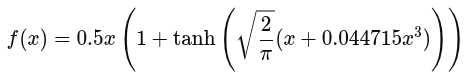
- **Características:**
  - Ativação suave inspirada na distribuição normal.
  - Usada em arquiteturas como o BERT.
  - Combina propriedades da ReLU e Tanh.

---

### 10. Mish
- **Fórmula:**  
  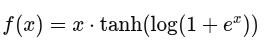
- **Características:**
  - Suave, não-monótona e contínua.
  - Similar ao Swish, mas com propriedades suavizadas.
  - Apresenta bons resultados em redes profundas.

---


# REFERÊNCIAS

O Neurônio, Biológico e Matemático. Data Science Academy. Acesso: https://www.deeplearningbook.com.br/o-neuronio-biologico-e-matematico/

F. Rosenblatt. The perceptron, a perceiving and recognizing automaton Project Para. Cornell Aeronautical Laboratory, 1957.

Perceptrons. An Introduction to Computational Geometry. MARVIN MINSKY and SEYMOUR PAPERT. M.I.T. Press, Cambridge, Mass., 1969.